# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, I gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [237]:
# import all necessary libraries
import numpy as np
import pandas as pd
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
# import tweepy
# from tweepy import OAuthHandler
import json
%matplotlib inline



1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [238]:
twitter_archive_enhanced = pd.read_csv('/Users/mac/Downloads/twitter-archive-enhanced (1).csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Get the Image Predictions file from a URL and write it on a file

In [239]:
# Get the image_predictions file using http requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Write the response content into a text file 
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [240]:
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1510,786036967502913536,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
1695,816336735214911488,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,1,Labrador_retriever,0.919330,True,kuvasz,0.049480,True,golden_retriever,0.011934,True
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072096,True


3. Get Data from tweets 

### NOTE:This particular page was instrumental in achieving this code below.

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [241]:
# # 
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_token_secret = ''

# # Authenticate User, Set access Token
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Get tweet_ids from df
# tweet_ids = twitter_archive_enhanced.tweet_id.values 
# tweet_ids

##### 3. Get all collect tweet contents using tweet ids

In [242]:
# all_tweets = []
# all_failed_tweets = []

# for tweet_id in tweet_ids:
    
#     # Exception Handling
#     try:
#         # Use get_status to collect tweets using their IDs
#         # Returns a get_status object
#         tweets = api.get_status(tweet_id)
#         all_tweets.append(tweets)
#         # Catch exceptions
#     except Exception as e:
#         all_failed_tweets.append(e)

# print(all_tweets)
# print(all_failed_tweets)

In [243]:
# # Create a list to store the Json Object 
    
# my_json_list =[]
 
# # Iterate through the get_status object to isolate the Json        
# for each_tweet in all_tweets:
#     my_json_list.append(each_tweet._json)
    
# # Write and Dump the json object into a txt file

# with open('tweet_json.txt','w') as json_file:
#     json_file.write(json.dumps(my_json_list, indent=4))
    
# # Create a list to store dictionary data      
# my_json_dict = []

# with open('tweet_json.txt', encoding='utf-8') as text_file:
#     my_all_data = json.load(text_file)
    
#     # extract the information from the t
#     for each_dictionary in my_all_data:
#         tweet_id = each_dictionary['id']
#         whole_tweet = each_dictionary['text']
#         only_url = whole_tweet[whole_tweet.find('https'):]
#         favorite_count = each_dictionary['favorite_count']
#         retweet_count = each_dictionary['retweet_count']
#         created_at = each_dictionary['created_at']
#         whole_source = each_dictionary['source']
#         only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
#         source = only_device
#         retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
#         if retweeted_status == 'Original tweet':
#             url = only_url
#         else:
#             retweeted_status = 'This is a retweet'
#             url = 'This is a retweet'
            
#         # append to list to create dataframe     

#         my_json_dict.append({'tweet_id': str(tweet_id),
#                              'favorite_count': int(favorite_count),
#                              'retweet_count': int(retweet_count),
#                              'url': url,
#                              'created_at': created_at,
#                              'source': source,
#                              'retweeted_status': retweeted_status,
#                             })
#         # Create Dataframe
#         tweet_api_df = pd.DataFrame(my_json_dict, columns = ['tweet_id', 'favorite_count', 
#                                                        'retweet_count', 'created_at',
#                                                        'source', 'retweeted_status', 'url'])
    
        

In [244]:
# tweet_api_df

In [245]:
# tweet_api_df.to_csv('tweet_api_df',index=False)

In [246]:
tweet_api_df = pd.read_csv('/Users/mac/Downloads/submit-8b570c2d-6c98-47c8-9c4a-4d0145ee9737/home/tweet_api_df')

## Assessing Data
In this section, I detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I use **both** visual assessment
programmatic assessement to assess the data.




### Virtual Assessment

In [247]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [248]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [249]:
tweet_api_df

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,33810,7009,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29330,5301,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22052,3481,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36939,7225,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35311,7760,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...
2321,666049248165822465,89,37,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2322,666044226329800704,247,115,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2323,666033412701032449,100,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2324,666029285002620928,112,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


### Programmatic Assessment

#### Twitter Archive

In [250]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [251]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [252]:
sum(twitter_archive_enhanced.duplicated())

0

In [253]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [254]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [255]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [256]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Image Predictions

In [257]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [258]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [259]:
sum(image_predictions.duplicated())

0

In [260]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [261]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [262]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [263]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### Twitter API

In [264]:
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2326 non-null   int64 
 1   favorite_count    2326 non-null   int64 
 2   retweet_count     2326 non-null   int64 
 3   created_at        2326 non-null   object
 4   source            2326 non-null   object
 5   retweeted_status  2326 non-null   object
 6   url               2326 non-null   object
dtypes: int64(3), object(4)
memory usage: 127.3+ KB


In [265]:
tweet_api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417857e+17,7055.267412,2471.598022
std,6.822171e+16,10965.207883,4185.962701
min,6.660209e+17,0.000000,1.000000
25%,6.780814e+17,1224.250000,494.250000
50%,7.178159e+17,3050.000000,1148.500000
75%,7.986600e+17,8608.750000,2860.750000
max,8.924206e+17,144890.000000,70739.000000


In [266]:
sum(tweet_api_df.duplicated())

0

In [267]:
tweet_api_df.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
source              0
retweeted_status    0
url                 0
dtype: int64

### Quality issues

twitter_archive_df

1. Rating Numerator and Ratings Denominator contain wrong Values

2. timestamp column is a string 

3. retweets are present in dataset 

4. name column is in different case, contains impossible Values


image_predictions_df

5. Column Names are not decriptive enough

6. p1 and p2 are in different cases


tweet_api_df

7. Delete Retweets

8. created_at is a string

### Tidiness issues
twitter_archive_df

1. Four Columns should be a single column

2. tweet_id column not consistent in the three tables

## Cleaning Data
In this section, I clean **all** of the issues I documented while assessing. 

**Note:** I copied the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [268]:
# Make copies of original pieces of data

twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

image_predictions_clean = image_predictions.copy()

tweet_api_df_clean = tweet_api_df.copy()


### Quality

##### Issue #1: Rating Numerator and Ratings Denominator contain wrong Values

#### Define: Treat both columns

#### Code

In [269]:
# Start with Ratings Denominator

twitter_archive_enhanced_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Rating denominator should have a constant value, we will further investigate all the rows with numbers other than 10 as denominator

In [270]:
# Get all dataset without 10 as denominator
wrong_values = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator']!= 10]

wrong_values


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [271]:
# Investigate the dataset further to understand why the ratings were incorrectly extracted
import re

counter = 0
for i in wrong_values.text:
    counter += 1
    print(f'{counter}. This is text: {i}')
    print()
    new_extract = re.findall(r'\d*\.?\d+\/\d{2}', i)
    print(f'{counter}.This is the rating extracted:', new_extract)
    print()
   



1. This is text: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

1.This is the rating extracted: ['960/00', '13/10']

2. This is text: @docmisterio account started on 11/15/15

2.This is the rating extracted: ['11/15']

3. This is text: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

3.This is the rating extracted: ['84/70']

4. This is text: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

4.This is the rating extracted: []

5. This is text: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

5.This is the rating extracted: ['9/11', '14/10']

6. This is text: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

6.This is the rating extracted: ['165/

Assessing the data in the text editor I can see all the 23 incorrectly extracted ratings and I will make the all the necessary adjustments. 

Due to the volume, I can further assess these datasets using their pictures to arrive at the correct ratings 

For those without double ratings, further Investigation will be done to ascertain the ratings, however, if nothing, it will be replace with 0

In [272]:
# Albanian 3 1/2 legged  Episcopalian

twitter_archive_enhanced_clean.iloc[2335, 10] = 9
twitter_archive_enhanced_clean.iloc[2335, 11] = 10

# entire platoon of puppers. Total score: 88/80 
# There are 8 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1843, 10] = 11
twitter_archive_enhanced_clean.iloc[1843, 11] = 10

# IT'S PUPPERGEDDON. Total of 144/120 ...I think
# There are 12 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1779, 10] = 12
twitter_archive_enhanced_clean.iloc[1779, 11] = 10


# This is Darrel. He just robbed a 7/11, ratings=10/10

twitter_archive_enhanced_clean.iloc[1662, 10] = 10
twitter_archive_enhanced_clean.iloc[1662, 11] = 10

In [273]:
#Clever puppers 121/110
# There are 12 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1635, 10] = 11
twitter_archive_enhanced_clean.iloc[1635, 11] = 10

# Two sneaky puppers were not initially seen, moving the rating to 143/130. 

twitter_archive_enhanced_clean.iloc[1635, 10] = 13
twitter_archive_enhanced_clean.iloc[1635, 11] = 10

# The tweet below is a reply to the one above

twitter_archive_enhanced_clean.iloc[1634, 10] = 0
twitter_archive_enhanced_clean.iloc[1634, 11] = 0

In [274]:
# here's a bucket of pups. 44/40 would pet all at once
# There are 4 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1433, 10] = 11
twitter_archive_enhanced_clean.iloc[1433, 11] = 10

# Here is a whole flock of puppers.  60/50 I'll take the lot
# There are 5 dogs in the picture, 12/10

twitter_archive_enhanced_clean.iloc[1351, 10] = 12
twitter_archive_enhanced_clean.iloc[1351, 11] = 10


# None know where camera is. 45/50 would hug all at once
# There are 5 dogs in the picture, 9/10

twitter_archive_enhanced_clean.iloc[1274, 10] = 9
twitter_archive_enhanced_clean.iloc[1274, 11] = 10

# brigade of puppers. All look very prepared for whatever happens next. 80/80
# There are 8 dogs in the picture, 10/10

twitter_archive_enhanced_clean.iloc[1254, 10] = 10
twitter_archive_enhanced_clean.iloc[1254, 11] = 10

# Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
# There are 9 dogs in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1228, 10] = 11
twitter_archive_enhanced_clean.iloc[1228, 11] = 10

# This is Bluebert.
# Amazed af. 11/10

twitter_archive_enhanced_clean.iloc[1202, 10] = 11
twitter_archive_enhanced_clean.iloc[1202, 11] = 10


# Happy 4/20 from the squad! 13/10 for all

twitter_archive_enhanced_clean.iloc[1165, 10] = 13
twitter_archive_enhanced_clean.iloc[1165, 11] = 10

# well behaved squad of doggos. 204/170 would try to pet all at once
# There are 17 doggos in the picture, 12/10

twitter_archive_enhanced_clean.iloc[1120, 10] = 12
twitter_archive_enhanced_clean.iloc[1120, 11] = 10

# this is Bretagne.
# last surviving 9/11 search dog, and our second ever 14/10. 

twitter_archive_enhanced_clean.iloc[1068, 10] = 14
twitter_archive_enhanced_clean.iloc[1068, 11] = 10

# Why does this never happen at my front door... 165/150 
# There are 15 dogs in the picture, 11/10

twitter_archive_enhanced_clean.iloc[902, 10] = 11
twitter_archive_enhanced_clean.iloc[902, 11] = 10

# the floofs have been released. 84/70
# There are 7 dogs in the picture, 12/10

twitter_archive_enhanced_clean.iloc[433, 10] = 12
twitter_archive_enhanced_clean.iloc[433, 11] = 10


# but 960/00 isn't a valid rating, 13/10 is tho

twitter_archive_enhanced_clean.iloc[313, 10] = 13
twitter_archive_enhanced_clean.iloc[313, 11] = 10





In [275]:

# account started on 11/15/15
twitter_archive_enhanced_clean.iloc[342, 10] = 0
twitter_archive_enhanced_clean.iloc[342, 11] = 0

# Meet Sam. She smiles 24/7 
twitter_archive_enhanced_clean.iloc[516, 10] = 0
twitter_archive_enhanced_clean.iloc[516, 11] = 0

# Yes I do realize a rating of 4/20
twitter_archive_enhanced_clean.iloc[1598, 10] = 0
twitter_archive_enhanced_clean.iloc[1598, 11] = 0

# Yes I do realize a rating of 4/20
twitter_archive_enhanced_clean.iloc[1663, 10] = 0
twitter_archive_enhanced_clean.iloc[1663, 11] = 0




I realized that some rating_numerators are actually in fractions and are incorrectly extracted

In [276]:

# Get all the fraction values
fraction_values = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]


/var/folders/w1/28w4z0fn4gg91y3ckzl9jwk00000gn/T/ipykernel_9149/2511474755.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fraction_values = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]


In [277]:
# Get an overview of the fraction values

for i in fraction_values['text']:
    print()
    print(i)


This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [278]:

# Treat fraction values 
twitter_archive_enhanced_clean.iloc[45, 5] = 13.5
twitter_archive_enhanced_clean.iloc[340, 5] = 9.75
twitter_archive_enhanced_clean.iloc[695, 5] = 9.75
twitter_archive_enhanced_clean.iloc[763, 5] = 11.27
twitter_archive_enhanced_clean.iloc[1689, 5] = 9.5
twitter_archive_enhanced_clean.iloc[1712, 5] = 11.26

#### Test

In [317]:
twitter_archive_enhanced_clean.rating_denominator.value_counts(normalize=True)

10    0.997701
0     0.002299
Name: rating_denominator, dtype: float64

##### Issue #2: timestamp is a string

#### Define: Convert timestamp column from a string to datetime

#### Code

In [279]:
# Convert to datetime
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#### Test

In [280]:
# Check for Datatype
twitter_archive_enhanced_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Issue #3:  retweets are present in dataset 

#### Define: Drop Retweets

#### Code

In [281]:
# Check for retweeted_status
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [282]:
# Drop  Retweets
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()].index, inplace=True, axis=0)

#### Test

In [283]:
# Check for retweeted_status
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #4:  name column is in different case and contains impossible Values

#### Define: Treat Name column


- Remove Impossible values and capitalize

#### Code


In [284]:
# Get a view of all the names in lower case
impossible_names = twitter_archive_enhanced_clean.name.str.contains(r'^[a-z]')

# impossible_names['name'].sample(20)
twitter_archive_enhanced_clean[impossible_names].name.head(20)


22            such
56               a
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
801              a
819           very
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
Name: name, dtype: object

In [285]:
twitter_archive_enhanced_clean.loc[impossible_names,'name'] = 'nil'

In [286]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean.name.str.capitalize()

#### Test

In [287]:



# Check for values in lower case

twitter_archive_enhanced_clean.name.str.islower().sum()

0

#### Issue #5: column names are not descriptive enough

#### Define: Rename Columns 

#### Code

In [288]:
image_predictions_clean.columns = ('tweet_id','jpg_url',	'img_num'	,'prediction_1',
'prediction_1_con',
'prediction_1_breed',

'prediction_2',
'prediction_2_con',
'prediction_2_breed',
'prediction_3',
'prediction_3_con',
'prediction_3_breed')

#### Test

In [289]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   jpg_url             2075 non-null   object 
 2   img_num             2075 non-null   int64  
 3   prediction_1        2075 non-null   object 
 4   prediction_1_con    2075 non-null   float64
 5   prediction_1_breed  2075 non-null   bool   
 6   prediction_2        2075 non-null   object 
 7   prediction_2_con    2075 non-null   float64
 8   prediction_2_breed  2075 non-null   bool   
 9   prediction_3        2075 non-null   object 
 10  prediction_3_con    2075 non-null   float64
 11  prediction_3_breed  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issue #6: prediction 1 - 3 not in the same case

#### Define: Capitalize the columns

#### Code

In [290]:
# Check for lower case
print(image_predictions_clean.prediction_3.str.islower().sum())
print(image_predictions_clean.prediction_2.str.islower().sum())
print(image_predictions_clean.prediction_1.str.islower().sum())

1131
1096
1135


In [291]:
# Treat the three prediction column
image_predictions_clean['prediction_1']= image_predictions_clean.prediction_1.str.capitalize()
image_predictions_clean['prediction_2'] = image_predictions_clean.prediction_2.str.capitalize()
image_predictions_clean['prediction_3'] = image_predictions_clean.prediction_3.str.capitalize()

#### Test

In [292]:
image_predictions_clean.prediction_1.str.islower().sum()

0

#### Issue #7: created_at is a string

#### Define: Treat created_at column

#### Code

In [293]:
# Check the datatype
tweet_api_df_clean.created_at.dtypes

dtype('O')

In [294]:
# Convert to datetime
tweet_api_df_clean['created_at'] = pd.to_datetime(tweet_api_df_clean['created_at'])

#### Test

In [295]:
tweet_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2326 non-null   int64              
 1   favorite_count    2326 non-null   int64              
 2   retweet_count     2326 non-null   int64              
 3   created_at        2326 non-null   datetime64[ns, UTC]
 4   source            2326 non-null   object             
 5   retweeted_status  2326 non-null   object             
 6   url               2326 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 127.3+ KB


#### Issue #8: retweets are present in dataset

#### Define: Delete Retweets in Dataset

#### Code

In [296]:
# Check for the status
tweet_api_df_clean.retweeted_status.value_counts()

Original tweet       2166
This is a retweet     160
Name: retweeted_status, dtype: int64

In [297]:
# Drop Retweets

retweets = tweet_api_df_clean[tweet_api_df_clean['retweeted_status']== 'This is a retweet']
tweet_api_df_clean.drop(retweets.index, inplace=True, axis=0)



#### Test

In [298]:
# Confirm only one unique value 'Original Tweet'
tweet_api_df_clean.retweeted_status.unique()

array(['Original tweet'], dtype=object)

### Tidiness

#### Issue #1: tweet_id should be of the same datatype in each table

#### Define: In tweet_api_df_clean,  Convert tweet_id to numeric to match

#### Code

In [299]:
# Check dtypes
tweet_api_df_clean.dtypes

tweet_id                          int64
favorite_count                    int64
retweet_count                     int64
created_at          datetime64[ns, UTC]
source                           object
retweeted_status                 object
url                              object
dtype: object

In [300]:
# Convert to Numeric

tweet_api_df_clean['tweet_id']= pd.to_numeric(tweet_api_df_clean['tweet_id'])

###### Test

In [301]:
tweet_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2166 non-null   int64              
 1   favorite_count    2166 non-null   int64              
 2   retweet_count     2166 non-null   int64              
 3   created_at        2166 non-null   datetime64[ns, UTC]
 4   source            2166 non-null   object             
 5   retweeted_status  2166 non-null   object             
 6   url               2166 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.4+ KB


#### Issue #2: Four Values are Variables (Columns)

#### Define: Concat the columns 

#### Code

In [302]:
# Get the stage  
stage = ['doggo', 'floofer', 'pupper', 'puppo']

# Replace None with '' for concat
for i in stage:
    twitter_archive_enhanced_clean[i]=twitter_archive_enhanced_clean[i].replace("None", "")




In [303]:
# combine all the columns
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo.str.cat(twitter_archive_enhanced_clean.floofer)
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].str.cat(twitter_archive_enhanced_clean.pupper).str.cat(twitter_archive_enhanced_clean.puppo)



In [304]:
# drop the four 
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)



In [305]:
# fill with nan for empty cells
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].replace('', np.nan)

In [306]:
# Define a function to replace with 'multiple'

def get_multiple(stage):
    if stage in ['doggopupper', 'doggopuppo', 'doggofloofer']:
        stage = 'multiple'
    else:
        pass
    return stage


In [307]:
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].map(get_multiple)

#### Test

In [308]:
twitter_archive_enhanced_clean.stage.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: stage, dtype: int64

### Merge Datasets

In [309]:
# Merge Datasets 

twitter_archive_master = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, how='left', on='tweet_id')

In [310]:
#Drop rows without picture (jpg_url)
twitter_archive_master = twitter_archive_master[twitter_archive_master['jpg_url'].notnull()]

In [311]:
# Merge datasets

twitter_archive_master = pd.merge(twitter_archive_master, tweet_api_df_clean, how='left', on='tweet_id')



## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [312]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data. I produce at least **three (3) insights and one (1) visualization.**

### Most Prominent Dog Stage

In [313]:
# Get the most prominent Dog Stage
twitter_archive_master.stage.value_counts()

pupper      203
doggo        63
puppo        22
multiple     11
floofer       7
Name: stage, dtype: int64

### Most Prominent Dog Breeds 

In [314]:
# Get the most prominent dog breeds
twitter_archive_master.groupby('prediction_1')['tweet_id'].count().sort_values(ascending=False).head(10)

prediction_1
Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy_poodle             38
Malamute               29
Name: tweet_id, dtype: int64

### Most Prominent Source

In [315]:
twitter_archive_master.source_y.value_counts(normalize=True)

Twitter for iPhone    0.980856
Twitter Web Client    0.014106
TweetDeck             0.005038
Name: source_y, dtype: float64

### Insights:
1. I was able to identify the most prominent dog breeds

2. I was able to identify the most prominent dog stage


3.  I was able to identify the most prominent source(aP)


/var/folders/w1/28w4z0fn4gg91y3ckzl9jwk00000gn/T/ipykernel_9149/3886551775.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparemt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('test.png',dpi=300, transparemt=True)


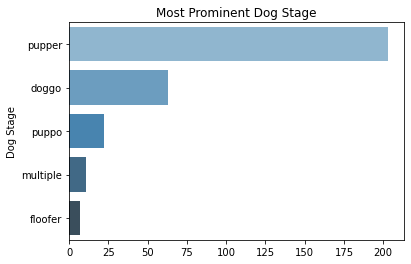

In [324]:
# Create a visualization

x=twitter_archive_master.stage.value_counts().index
y=twitter_archive_master.stage.value_counts().values

sns.barplot(x=y,y=x,palette="Blues_d")
plt.ylabel('Dog Stage')
plt.title('Most Prominent Dog Stage')
plt.savefig('test.png',dpi=300, transparemt=True)
